In [1]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt 

### Вариант 65 

In [2]:
a = 0.35 # коэффициент заболеваемости
b = 0.13 # коэффициент выздоровления

N = 18354 # общая численность
I0 = 102 # количество инфицированных особей в начальный момент времени
R0 = 100 # количество здоровых особей с иммунитетом в начальный момент времени
S0 = N - I0 - R0 # количество восприимчивых к болезни особей в начальный момент времени

### Случай, когда $ I(0) \leq I^* $

In [3]:
def syst(x, t):
    dx0 = 0
    dx1 = - b*x[1]
    dx2 = b*x[1]
    return dx0, dx1, dx2

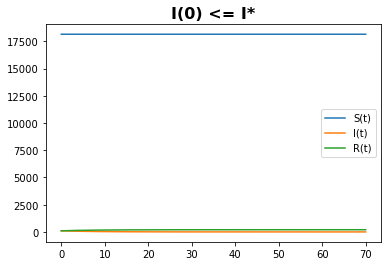

In [6]:
x0 = [S0, I0, R0] # начальные значения
t = np.arange(0, 70, 0.01)
y = odeint(syst, x0, t)

# Динамика изменения в каждой из трёх групп
plt.plot(t, y[:,0], label='S(t)')
plt.plot(t, y[:,1], label='I(t)')
plt.plot(t, y[:,2], label='R(t)')
plt.title('I(0) <= I*', fontsize=16, fontweight=1000)
plt.legend()

### Случай, когда $ I(0) > I^*$

In [7]:
def syst(x, t):
    dx0 = -a*x[0]
    dx1 = a*x[0] - b*x[1]
    dx2 = b*x[1]
    return dx0, dx1, dx2

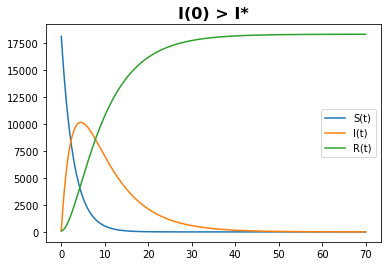

In [8]:
y = odeint(syst, x0, t)

# Динамика изменений
plt.plot(t, y[:,0], label='S(t)')
plt.plot(t, y[:,1], label='I(t)')
plt.plot(t, y[:,2], label='R(t)')
plt.title('I(0) > I*', fontsize=16, fontweight=1000)
plt.legend()